# 1. Proje Tanımı ve Hedef Belirleme
## Neden Bu Projeyi Yapıyoruz?

Bir bankada çalışan müşteri temsilcisi olduğumuzu düşün. Amacımız, “Hangi müşterilerimiz yakın zamanda bankayı terk edebilir?” sorusunu cevaplamak.

Eğer ayrılacak potansiyel müşterileri önceden bilirsek, onlara özel teklif hazırlayabilir, sadakat programı sunabiliriz.

Problemin Türü

Elimizde her müşteri için “Exited” (0 veya 1) bilgisi var.

0 = Müşteri bankada kalmaya devam etti.

1 = Müşteri bankayı terk etti.

Bu yüzden sınıflandırma (classification) problemiyle karşı karşıyayız: Her müşteriyi “kalacak” veya “ayrılacak” olarak etiketleyeceğiz.

## Başarı Ölçütleri

Modelimiz ne kadar doğru tahmin ediyor?

“Doğru tahmin”leri ölçmek için:

Accuracy (Doğruluk): Tüm tahminlerin ne kadarını doğru yaptı?

Precision (Kesinlik): “Ayrılacak” dediğimiz müşterilerin gerçekten ne kadarı ayrıldı?

Recall (Duyarlılık): Gerçekten ayrılan müşterilerin ne kadarını modelimiz “ayrılacak” diye işaretledi?

AUC‑ROC: Modelin genel ayırt edicilik yeteneğini gösteren özel bir grafik altındaki alan.


# 2- Kütüphanelerin import edilmesi

In [67]:
!pip install xgboost



In [68]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression       
from sklearn.ensemble import RandomForestClassifier       
from xgboost import XGBClassifier                       
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (classification_report,    
                             confusion_matrix,         
                             roc_auc_score,             
                             roc_curve)  

# 3- Veri İnceleme

In [69]:
df=pd.read_csv("Churn_Modelling.csv")

In [70]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [72]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [73]:
df.shape

(10000, 14)

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## 3.1- Görselleştirme

<Axes: >

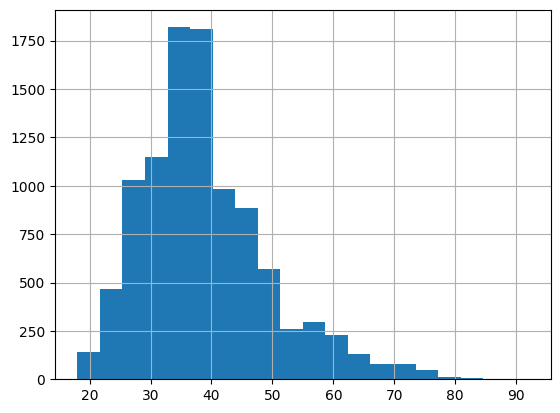

In [75]:
df["Age"].hist(bins=20)

<Axes: xlabel='Geography'>

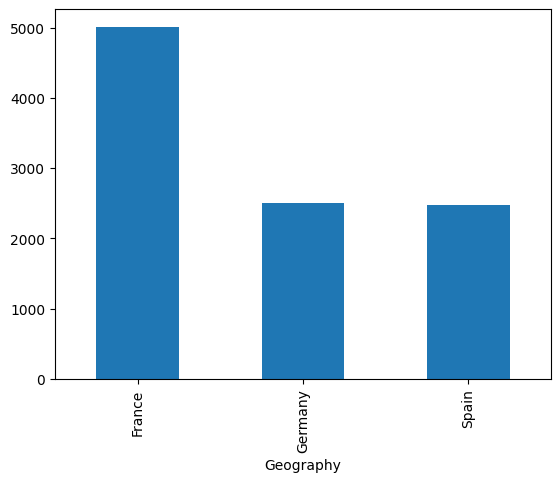

In [76]:
df["Geography"].value_counts().plot.bar()

Text(0.5, 1.0, 'Churn Oranı')

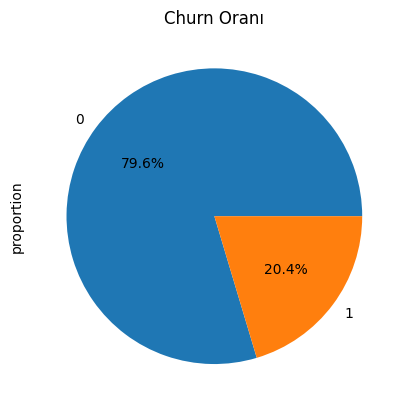

In [77]:
df["Exited"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Churn Oranı")

<Axes: >

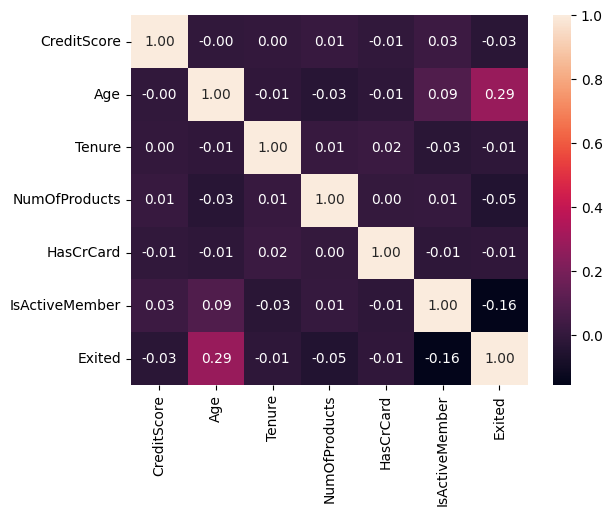

In [78]:
corr_exclude=["RowNumber","CustomerId"]


corr=df.drop(columns=corr_exclude).select_dtypes(include="int").corr()
sns.heatmap(corr,annot=True, fmt=".2f")

Text(0.5, 1.0, 'Bakiye vs Ayrılma')

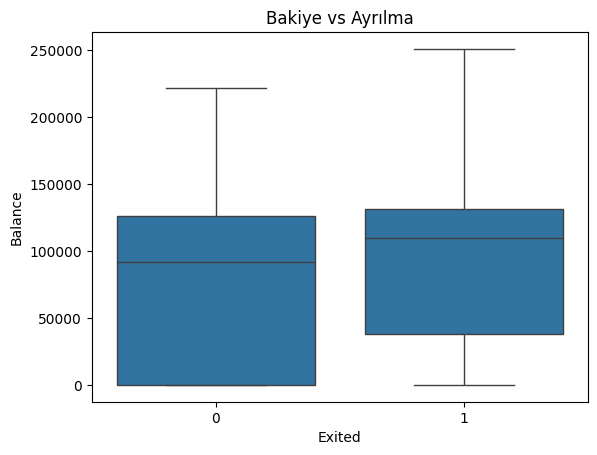

In [79]:
sns.boxplot(data=df,x="Exited",y="Balance")
plt.title('Bakiye vs Ayrılma')


## 3.2-Veri Ön İşleme

In [80]:
df=df.drop(["Surname","RowNumber"],axis=1)

In [81]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

### Hedef ve Özellik Ayrımı

In [82]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

### Verinin Eğitim ve Test Olarak Bölünmesi

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

### Sayısal Özellikleri Ölçekleme

In [84]:
scaler= StandardScaler()
num_cols=["CreditScore","Age","Balance","EstimatedSalary","Tenure"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [85]:
X_train['ZeroBalance'] = (X_train['Balance'] == 0).astype(int)
X_test['ZeroBalance']  = (X_test['Balance'] == 0).astype(int)
X_train['AgeCat'] = pd.cut(X_train['Age'], bins=[0, 30, 50, 100], labels=['<30','30-50','50+'])
X_train = pd.get_dummies(X_train, columns=['AgeCat'], drop_first=True)
X_test['AgeCat'] = pd.cut(X_test['Age'], bins=[0, 30, 50, 100], labels=['<30','30-50','50+'])
X_test = pd.get_dummies(X_test, columns=['AgeCat'], drop_first=True)

## 4-Model Seçimi ve Eğitimi


### 4.1-Modellerin Tanımlanması

In [86]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

### 4.2- Cross‑Validation ile Karşılaştırılması

In [64]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train,
                             cv=5, scoring='roc_auc')
    print(f"{name}: Ortalama AUC = {scores.mean():.3f}")

LogisticRegression: Ortalama AUC = 0.753
RandomForest: Ortalama AUC = 0.854


C:\Users\casper\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\casper\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\casper\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\casper\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:42] WARNING: C:\a

XGBoost: Ortalama AUC = 0.846


## 5- Hiperparametre Optimizasyonu


### 5.1-Grid Search

In [87]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2] }

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

### 5.2-En İyi Parametreler

In [89]:
print("En iyi parametreler:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf

En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

## 6.Model Değerlendirme

### 6.1- Test Verisinde Tahmin

In [91]:
y_pred = best_rf.predict(X_test)                    
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]   


### 6.2-Precision, Recall, F1-score

In [92]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.83      0.43      0.56       407

    accuracy                           0.87      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.87      0.85      2000



### 6.3-Karışıklık Matrisi

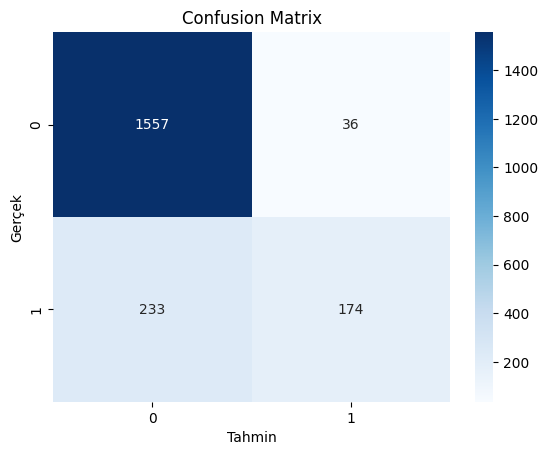

In [93]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

### 6.4- ROC AUC Skoru(Genel Başarı)

In [94]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"📈 Test Seti ROC AUC Skoru: {auc:.3f}")

📈 Test Seti ROC AUC Skoru: 0.859


### 6.5-ROC Eğrisi (Grafik)

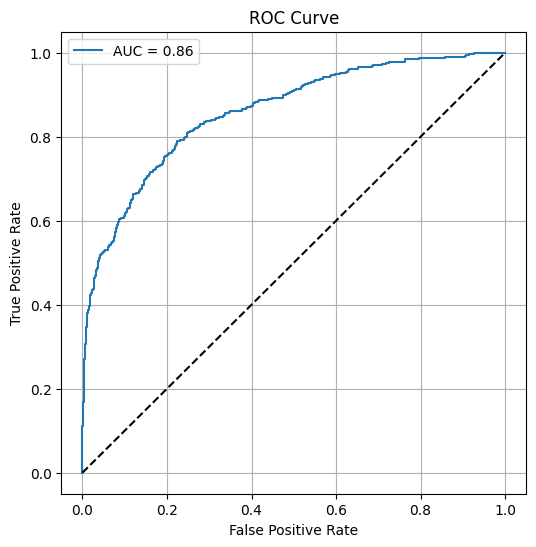

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')  # rastgele çizgi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

### 6.6- Özellik Önem Sıralaması 

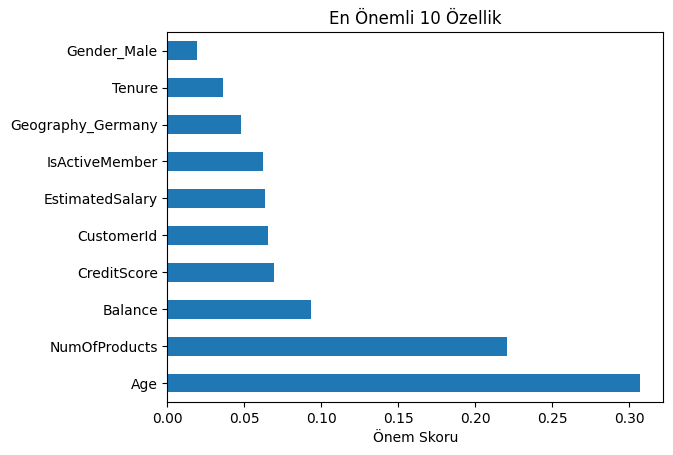

In [97]:

feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')

plt.title("En Önemli 10 Özellik")
plt.xlabel("Önem Skoru")
plt.show()